<a href="https://www.kaggle.com/code/yutodennou/preprocessing-draw-world-map-by-folium?scriptVersionId=179710935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

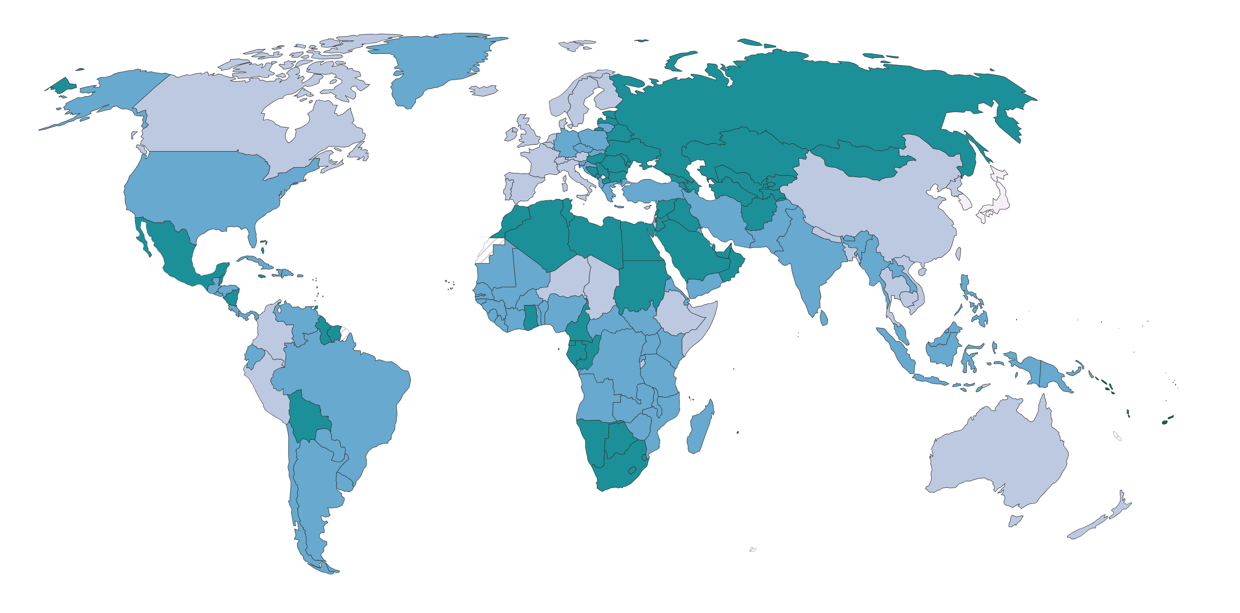

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 1. Purpose🎉 </b></div>

**Draw a map to compare trends in different countries using `Folium`**

<div style="background-color:#f0fae9; padding:6px 20px; border-radius:15px; font-size:20px">
    <br>
    <div style="font-weight:bold;font-size:24px;">💡Direction</div>
    <ul style="font-size:18px;">
      <li>Get Geo.Json having country name and geographic info</li>
      <li>Use choropleth of Folium</li>
    </ul>
</div>

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 2. Preparation⚙️</b></div>

**You can use `geo.json` by importing from this notebook or making customized one from [here](https://geojson-maps.kyd.au/)**

In [1]:
path_geo_json = '/kaggle/input/geojson/custom.geo.json'

In [47]:
import folium
import pandas as pd
import geopandas as gpd

gdf = gpd.read_file(path_geo_json)

In [48]:
df = pd.read_csv('/kaggle/input/death-and-obesity/train.csv')
df.head()

,Country,Code,Year,Population,Percentage-Overweight,Mean-Daily-Caloric-Supply,Mean-BMI-Male,Mean-BMI-Female,Percentage-Overweighted-Male,Percentage-Overweighted-Female,Prevalence-Hypertension-Male,Prevalence-Hypertension-Female,Prevalence-Obesity,Death-By-High-BMI
0,Afghanistan,AFG,1990,10694804,9.1,2314.0,20.502805,20.866283,8.6,11.8,33.2,37.7,1.3,1327384.20
1,Afghanistan,AFG,1991,10745168,9.2,2044.0,20.590861,20.993526,8.9,12.2,33.3,37.7,1.4,1296281.40
2,Afghanistan,AFG,1992,12057436,9.3,1891.0,20.677628,21.121229,9.2,12.6,33.4,37.8,1.5,1265752.80
3,Afghanistan,AFG,1993,14003764,9.3,1910.0,20.763539,21.249272,9.5,13.1,33.5,37.8,1.5,1249348.14
4,Afghanistan,AFG,1994,15455560,9.3,1820.0,20.848828,21.377184,9.8,13.5,33.6,37.9,1.6,1239039.60


#### Check the difference of notation of country name between train data and geo.json

In [49]:
set(gdf['sovereignt'].unique())-set(df['Country'].unique())

{'Antarctica',
 'Democratic Republic of the Congo',
 'Ivory Coast',
 'Kosovo',
 'Northern Cyprus',
 'Republic of Serbia',
 'Republic of the Congo',
 'Somaliland',
 'The Bahamas',
 'United Republic of Tanzania',
 'United States of America',
 'Western Sahara',
 'eSwatini'}

In [50]:
set(df['Country'].unique())-set(gdf['sovereignt'].unique())

{'American Samoa',
 'Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Cape Verde',
 'Comoros',
 'Congo',
 'Cook Islands',
 "Cote d'Ivoire",
 'Democratic Republic of Congo',
 'Dominica',
 'Eswatini',
 'Greenland',
 'Grenada',
 'Guam',
 'Kiribati',
 'Maldives',
 'Malta',
 'Marshall Islands',
 'Mauritius',
 'Micronesia (country)',
 'Monaco',
 'Nauru',
 'Niue',
 'Northern Mariana Islands',
 'Palau',
 'Palestine',
 'Puerto Rico',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Tanzania',
 'Tokelau',
 'Tonga',
 'Tuvalu',
 'United States',
 'United States Virgin Islands',
 'World'}

In [51]:
df.loc[df['Country']=='United States','Country']='United States of America'
df.loc[df['Country']=='Democratic Republic of Congo','Country']='Democratic Republic of the Congo'
df.loc[df['Country']=="Cote d'Ivoire",'Country']='Ivory Coast'
df.loc[df['Country']=='Serbia','Country']='Republic of Serbia'
df.loc[df['Country']=='Congo','Country']='Republic of the Congo'
df.loc[df['Country']=='Bahamas','Country']='The Bahamas'
df.loc[df['Country']=='Tanzania','Country']='United Republic of Tanzania'
df.loc[df['Country']=='Eswatini','Country']='eSwatini'

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 3. Visualize the World Map🌟</b></div>


In [ ]:
data = df[df['Year']==2013].reset_index(drop=True)

In [53]:
m = folium.Map(location=[0,0], zoom_start=1.5)

folium.Choropleth(
    geo_data=path_geo_json,
    name='choropleth',
    data=data,
    columns=['Country', 'Death-By-High-BMI'],
    key_on='feature.properties.sovereignt',
    fill_color='BrBG',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Happiness Score'
).add_to(m)

folium.LayerControl().add_to(m)

m

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 0px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  border:#E57C23 solid; color:rgb(34, 34, 34); background-color: #FFFAF0; "> <b> 4. Summary🌞</b></div>

<div style="background-color:#fbf5e0; padding:12px 20px; border-radius:15px; font-size:20px">
    With folium, you can compare data from around the world. As you know this map can be zoomed and the coordinates can be moved. Therefore, it can be saved in html format
</div>



In [ ]:
m.save("data.html")

**Thank you for reading!! Please follow my profiles!!**

[![Github](https://img.shields.io/badge/--FFFFFF?style=social&logo=github&label=Follow%20yutowac)](https://github.com/yutowac)


[![LinkedIn](https://img.shields.io/badge/--FFFFFF?style=social&logo=LinkedIn&label=Follow%20yutowac)](https://www.linkedin.com/in/wachi-yuto-b43ab3a2/)